<a href="https://colab.research.google.com/github/A-jha/TENSOR-FLOW-LAB/blob/master/01_Neural_Network_Regration_Wth_TensoFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network regression wiyh Tensorflow

## What is Regression ?
Predicting a numerical a varible based on some other combination of variables, even shorter... predicting a number.

In Statistical modeling, regression analysis is a set of Statistical processes for estimating the relationship between dependent (output varible) and one or more independent variable.

Example : You are a small Restaurant owner . Tip are the best way to keep happy the waiters.
- Tip value depends on total bill.
- Now You would like to develop a model that will allow you to predics amount of bill.

**Residual :** The distance from best fit line to actual value is called residual / error.
  - Residual  always sumups to 0 .
  - A good reggression model minimizes the SSE (Sum of Squared error).

**Note :** The best bit regression line must pass through centroid.



In [38]:
# import tensorflow
import tensorflow as tf
print(tf.__version__)

2.5.0


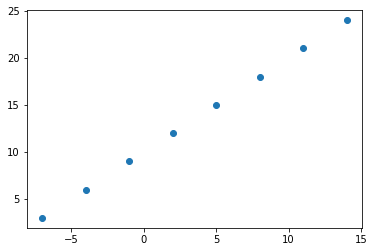

In [39]:
## Create some data 
import numpy as np
import matplotlib.pyplot as plt

# Create Features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create a label
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# visualize it
plt.scatter(X,Y)

In [40]:
# Relation between X and Y
Y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output Shapes

In [41]:
# create a dummy data for housing price prediction
house_info = tf.constant(["beedroom", "bathroom", "garage"])
house_price = tf.constant([934500]) 
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'beedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([934500], dtype=int32)>)

In [42]:
# Turn Numpy array into tensors
X = tf.constant(X)
Y = tf.constant(Y)
X,Y
tf.cast(X,dtype=tf.float32)
tf.cast(Y,dtype=tf.float32)

<tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>

In [43]:
#Here we have input as scaler and output as Scaler
input_shape = X[0].shape
output_shape = Y[0].shape 
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in Modeling with Tensorflow
1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.

2. Compiling a model - 
  - define loss function (in other words, the function which tells our model how wrong it is)
  - The optimzer (tells our model how to improve the patterns its learning)
  - evaluation matrix (what we can use to interpret the performance of our model)
3. Fitting a model- letting the model to fins pattern between X and Y(features and labels)
  - epochs - How many time our mpdel will go through all the training example.

**mae :**- mean absolute error

In [44]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

#2. compile the model
model.compile(loss= tf.keras.losses.mae, # mae - mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # sgd - stochasitc gradient descent
              metrics = ["mae"]             
)

# fit the model
model.fit(X,Y,epochs = 5)

Epoch 1/5
1/1 [==============================] - 0s 245ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748


In [45]:
# Check X and Y
X,Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [46]:
# Try to make prediction using model
model.predict([17.0])

array([[12.716021]], dtype=float32)

## Improving Model
We can improve our model, by altering the steps we took to create a model.
1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - Here we might the optimization  function or learning rate of the optimization function.

3. **Fitting a model** - Here we might fit a model for more epochs(leave it training for long) or add more data to learn from.

In [47]:
# Let's rebuild our model
#1. Create the model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss = "mae",
              metrics =[ "mae"])

# fit the model
model.fit(X,Y,epochs = 200,verbose=0)

In [48]:
# Our Data
X,Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [49]:
# lets predict with improved model
model.predict([17.0])

array([[30.489859]], dtype=float32)

In [50]:
# let's add  more layer to our model to improve it
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100,activation="relu"),
                             tf.keras.layers.Dense(100, activation="relu"),
                             tf.keras.layers.Dense(1)
])

model.compile(optimizer= tf.keras.optimizers.SGD(),
              loss = "mae",
              metrics = ["mae"])

model.fit(X,Y,epochs = 100,verbose=0)

In [51]:
 # lets predict
 model.predict([17.0])

array([[32.258904]], dtype=float32)

In [52]:
# Change the optimizer to improve our model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100,activation="relu"),
                             tf.keras.layers.Dense(100, activation = "relu"),
                             tf.keras.layers.Dense(1)
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    loss = "mae",
    metrics = ["mae"]
)

model.fit(X,Y,epochs =100,verbose=0)

In [53]:
# predict again
model.predict([17.0])

array([[27.83362]], dtype=float32)

### Evaluate the model
When it comes to evaluation ... there are three words to say:
> "Visualize , visualize, visualize "

It's good idea to visualize:
- The data - what data are we working with ? what does it look like ?
- The model itself - what does our model look like ?
- The training of a model - how does a model performs while it learns ?
- The prediction of the model - how do the prediction of model lineup agains thew ground truth ?
 

In [54]:
# make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [55]:
# Make labels for the dataset
Y = X + 10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

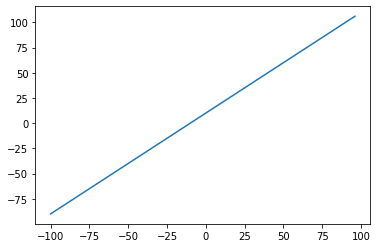

In [56]:
# visualize the data
plt.plot(X,Y)

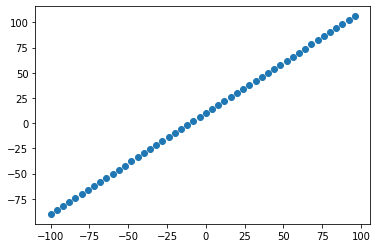

In [57]:
# scatter plot
plt.scatter(X,Y)

### The 3 sets . . 
- Training Sets - the models learn from this data (70-80 %)
- Validation set - The model gets tuned on this data, which is 10 to 15 %
- Test Set - The model gets evaluated on this data to test what it has learned 10 to 15 %

In [58]:
# check the length of sample
len(X)

50

In [59]:
# Split data into training and testing dataset
X_train = X[:40]
X_test = X[40:]

Y_train = Y[:40]
Y_test = Y[40:]

len(X_train) , len(X_test)

(40, 10)

# Visualizing the data
Now we've got our data in training and test sets... let's visualize it

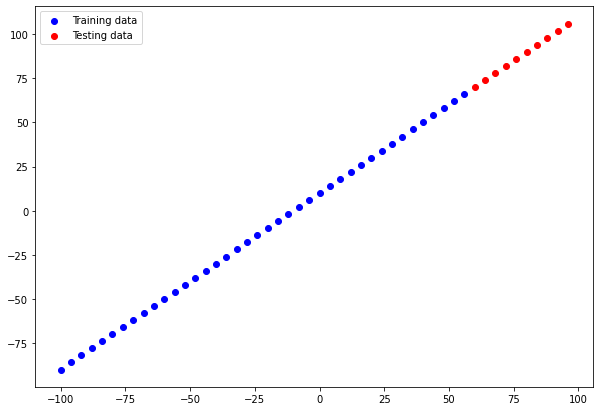

In [60]:
plt.figure(figsize=(10,7))

# plot training data in blue
plt.scatter(X_train, Y_train, c="b", label = "Training data")

# plot test data in green
plt.scatter(X_test,Y_test,c="r",label ="Testing data" )

# show a legend
plt.legend();

In [61]:
# let's build a neural network for our data

# 1. Create a model with one layer of neurons
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model with SGD Optimizer first
model.compile(
               optimizer = tf.keras.optimizers.SGD(),
               loss = "mae",
               metrics = ["mae"]
)

# 3. fit the data into model
model.fit(X_train,Y_train,epochs=100,verbose=0)

In [62]:
# Improve our model by adding some layer with relu activation function
# 1. Create model -  add more layer to our model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100, activation="relu"),
                             tf.keras.layers.Dense(100, activation="relu"),
                             tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(
    loss = "mae",
    optimizer = tf.keras.optimizers.SGD(),
    metrics =["mae"]
)

# 3. Fit the model
model.fit(X_train, Y_train, epochs= 100,verbose=0)

In [63]:
# Improve our model by changing opimizer from SGD to Adam

# 1. Create a model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100, activation = "relu"),
                              tf.keras.layers.Dense(100, activation = "relu"),
                             tf.keras.layers.Dense(1)
]) 

# 2. Compling a model
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=.01),
    loss = "mae",
    metrics = ["mae"]
)

# 3. fit the model
model.fit(X_train, Y_train, epochs=100,verbose=0)

In [64]:
# Now we can see we have a good accuracy lets predict the value
model.predict(X_test), Y_test

(array([[ 66.70861 ],
        [ 70.50643 ],
        [ 74.30421 ],
        [ 78.102005],
        [ 81.90981 ],
        [ 85.718864],
        [ 89.52671 ],
        [ 93.333534],
        [ 97.14044 ],
        [100.94737 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [65]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 100)               200       
_________________________________________________________________
dense_31 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 101       
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


- **Total Params** is the number of parameters in the model.
- **Trainable Params** are the prameters (pattern) the model can update as it trains.
- **Non-tainable Params** are not updated during training (thi id typical when you bring in already learn pattern or prameters from other models during transfer learning). 

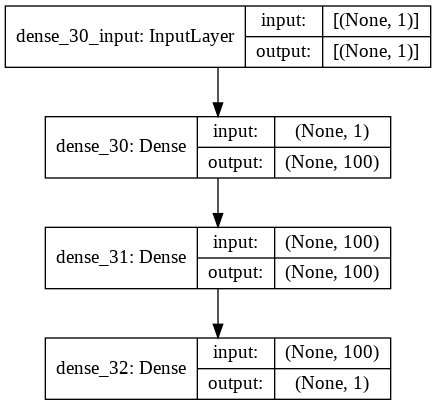

In [67]:
# Visualize the model
from tensorflow.keras.utils import  plot_model

plot_model(model = model, show_shapes=True)